<a href="https://colab.research.google.com/github/kfrancis2017/csce556-labs/blob/main/CSCE556_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCE 556 - Analysis of Experimental Data in Python

## Laboratory 4 - Data Visualization

This laboratory aims to teach you how to realize complex plots with Python Matplotlib and Seaborn packages.

In [70]:
# Install some required package, if they are not already installed
!pip install qrcode

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import qrcode
import pandas as pd

Using `plt.subplots`, create a 2 (height) X 3 (width) grid of plots in a figure of 10 (height) X 12 (width) inches. Note that `plt.subplots` returns two objects, one of the class `Figure` and another which is a `numpy` array of objects of the class `Axes`.

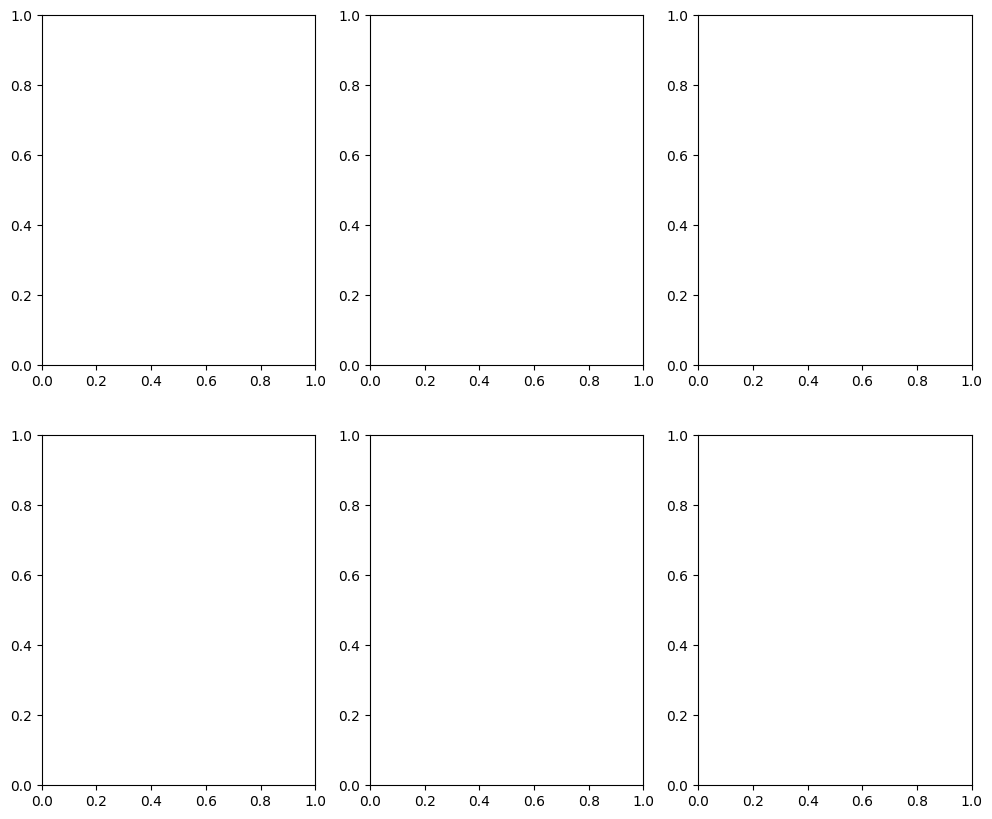

In [72]:
##### insert your code #####
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(12, 10)
############################

For this lab, we will reuse the PSD data generated from EEG recordings during Lab 3. Using Seaborn's `violinplot` function, display a violing plot in the top left panel showing the distribution (across channels) of the PSD at 9.7 Hz. Use the subject ID for `x` and the experiment type for the `hue` attribute.

Note that Jupyter always displays the object returned by the last instruction of the cell. When plotting in an existing figure, the figure is not returned by the last instruction of the cell. Therefore, Jupyter does not show this figure automatically. To display it, you can return the `Figure` object you used for plotting at the last line of the cell (i.e. if you named this object `fig`, then just write `fig` on the last line of the cell).

It may be convenient at first to draw these plots using separate figures and to put them all together in the same figure only at the end when you are satisfied with all five plots. It allows you to test your code multiple times without reinitializing the main figure every time.

**Note**: You can start with the `psds_df` data frame loaded by the cell below and melt it to transform it from wide to long format.

In [73]:
import urllib.request

url = "https://www.dropbox.com/scl/fi/htbx8k6zyrwot3ezhy94g/lab2_psds_df.csv?rlkey=cx1due0g44gy3dqm4089krewa&dl=1"
urllib.request.urlretrieve(url, "psds_df.csv");
psds_df = pd.read_csv("psds_df.csv", index_col=0)
psds_df.head()

,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,FC2,...,P1,P2,P6,PO7,PO3,POz,PO4,PO8,subject,exp_type
frequencies,,,,,,,,,,,,,,,,,,,,,
0.0,5.296473e-12,5.345212e-12,4.839363e-12,1.194496e-12,8.185229e-13,2.015723e-12,3.553680e-12,1.841777e-12,2.881066e-14,5.412896e-14,...,9.662441e-13,1.971637e-12,1.020278e-12,7.323966e-13,7.133765e-13,1.335183e-12,1.606456e-12,9.914420e-13,32480,EO
0.1,9.617907e-12,9.376135e-12,8.144545e-12,1.875522e-12,1.562134e-12,3.555659e-12,5.262979e-12,2.922395e-12,7.400721e-14,1.079767e-13,...,4.072498e-12,5.743528e-12,4.642100e-12,2.933705e-12,4.680520e-12,5.701553e-12,6.637278e-12,4.468408e-12,32480,EO
0.2,1.065529e-11,1.142334e-11,9.773208e-12,2.270169e-12,1.426086e-12,4.128516e-12,6.322388e-12,4.381336e-12,2.776335e-13,2.650003e-13,...,3.324117e-12,4.309392e-12,6.100235e-12,2.646616e-12,3.394135e-12,4.230686e-12,6.822197e-12,5.980368e-12,32480,EO
0.3,2.086972e-11,1.998838e-11,1.086430e-11,4.013279e-12,2.990372e-12,7.300068e-12,9.220488e-12,4.906117e-12,6.293578e-13,5.530025e-13,...,1.305469e-11,2.192058e-11,2.840842e-11,1.752862e-11,2.340383e-11,3.297861e-11,4.232137e-11,3.631017e-11,32480,EO
0.4,2.418604e-11,2.331679e-11,1.886223e-11,6.750615e-12,2.094963e-12,5.637580e-12,1.171261e-11,1.138564e-11,1.067144e-12,5.971324e-13,...,3.140410e-11,3.694947e-11,4.314551e-11,2.638150e-11,4.756646e-11,5.310054e-11,5.584660e-11,4.588419e-11,32480,EO


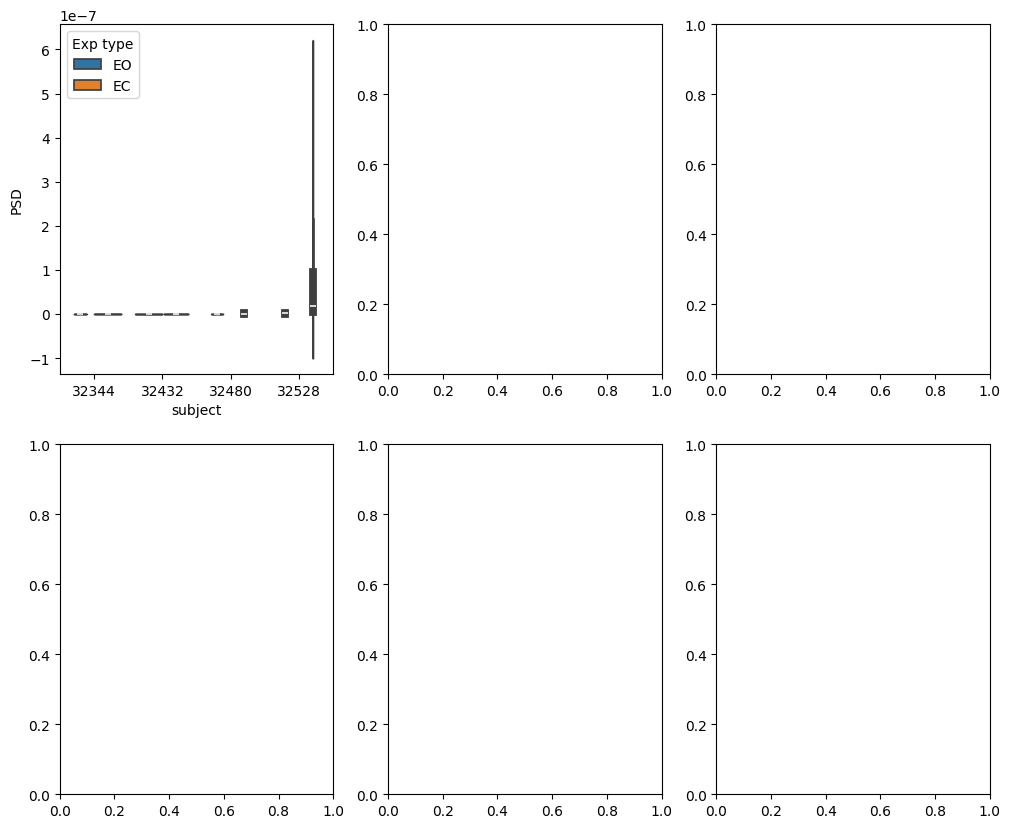

In [74]:
##### insert your code #####
psds_long = psds_df.reset_index()
psds_slice = psds_long[psds_long["frequencies"] == 9.7]
values = [col for col in psds_slice.columns if col not in ["frequencies", "subject", "exp_type"]]
psds_slice = psds_slice.melt(id_vars=["subject", "exp_type"], value_vars=values, var_name="channel", value_name="PSD")
sns.violinplot(
    data=psds_slice,
    x=psds_slice['subject'],
    y=psds_slice['PSD'] ,
    hue=psds_slice['exp_type'],
    ax=axes[0,0]
)

# Getting a duplication error in the legend
handles, labels = axes[0,0].get_legend_handles_labels()
unique = dict(zip(labels, handles))
limited_labels = list(unique.keys())[:2]
limited_handles = [unique[label] for label in limited_labels]

axes[0,0].legend(limited_handles, limited_labels, title="Exp type")
fig
############################

The plot you will obtain will not be convincing... This result is due mostly to the fact that PSD values span many orders of magnitude with an exponentially decreasing probability. Because of that, a few points with very large amplitude stretch the y-axis so that most of the distribution gets squeezed around the y=0 line. A typical way to make such data easier to visualize is to transform them by taking the logarithm of these PSD values. The second panel of the first row shows the same plot as before but for the $log_{10}$-transformed PSD (i.e., use `np.log10`).

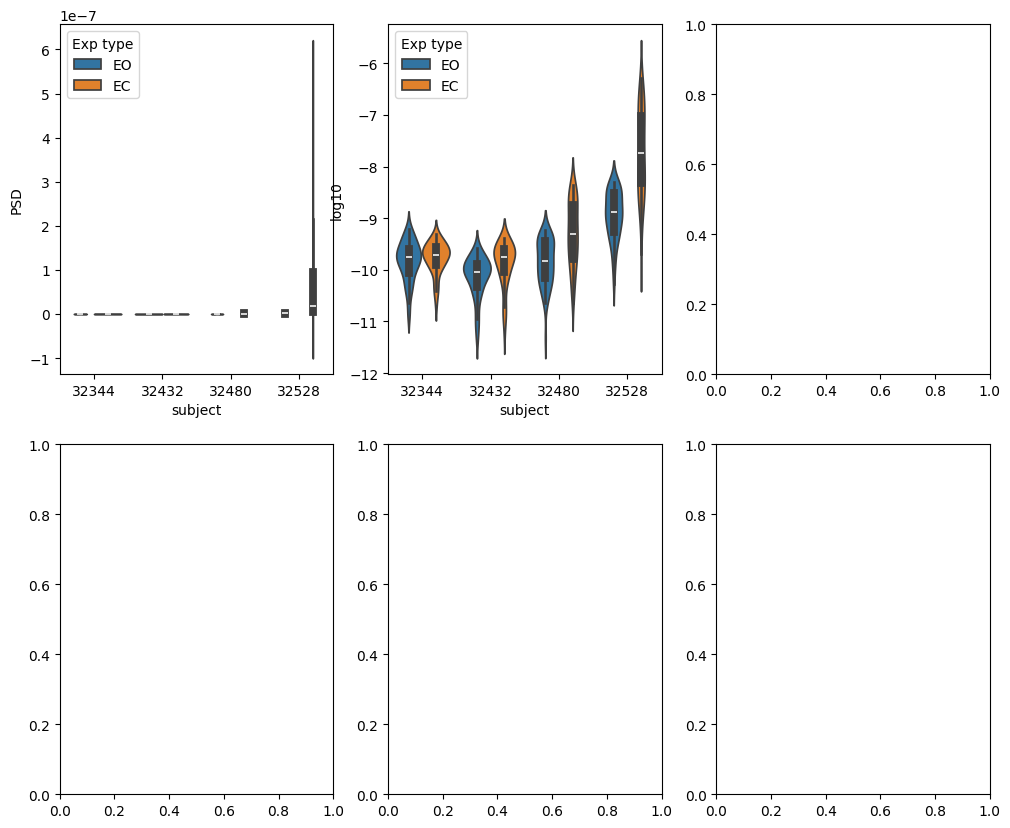

In [75]:
##### insert your code #####
psds_slice["log10"] = np.log10(psds_slice["PSD"])
sns.violinplot(
    data=psds_slice,
    x=psds_slice['subject'],
    y=psds_slice['log10'] ,
    hue=psds_slice['exp_type'],
    ax=axes[0,1])

# Getting a duplication error in the legend
handles, labels = axes[0,1].get_legend_handles_labels()
unique = dict(zip(labels, handles))
limited_labels = list(unique.keys())[:2]
limited_handles = [unique[label] for label in limited_labels]

axes[0,1].legend(limited_handles, limited_labels, title="Exp type")
fig
############################

To better appreciate the relationship between EO and EC peak amplitudes, display in the third panel of the first row the same data you plotted before, but this time as a scatter plot (use `plt.scatter`) with EO $log_{10}(PSD)$ values along the x-axis, the EC $log_{10}(PSD)$ values along the y-axis, for pair of (EO, EC) values for each subject and channel. Use a different color for each subject. Use a legend to show what subject corresponds to what color.

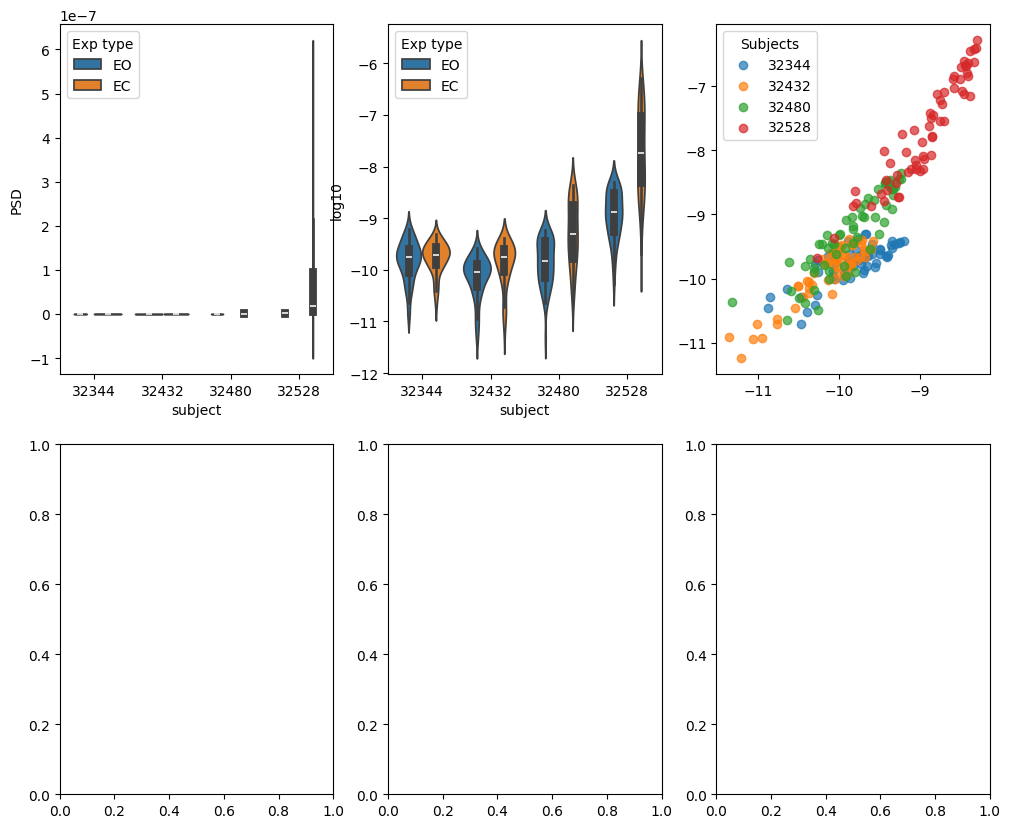

In [76]:
##### insert your code #####
scatter_data = psds_slice.pivot_table(index=["subject", "channel"], columns="exp_type", values="log10").reset_index()

for subj, group in scatter_data.groupby("subject"):
    axes[0,2].scatter(group["EO"], group["EC"], label=subj, alpha=0.7)

# Getting a duplication error in the legend
handles, labels = axes[0,2].get_legend_handles_labels()
unique = dict(zip(labels, handles))
limited_labels = list(unique.keys())[:4]
limited_handles = [unique[label] for label in limited_labels]

axes[0,2].legend(limited_handles, limited_labels, title="Subjects")

fig
############################

Use Seaborn's `lineplot` function to show $log_{10}(PSD)$ as a function of the frequency for channels `Fz` and `PO8`, using channels as `hue` and experiment type as `style`. I recommend using `data = psds_df.loc[psds_df.index.unique()[::10]]` to decimate by a factor of 10 the frequencies to be displayed. Also, you can use `n_boot=100` in your call to `lineplot` to accelerate the computation of the interval of confidences*.

\* **Supplementary material**: These intervals of confidence are computed using bootstrapping, a technique in which some statistic (e.g., the mean value) is calculated iteratively (i.e., in this case, 100 times) using random subsamples of data. This technique gives you a distribution of values for your target statistic (i.e., the mean) from which you can take, e.g., the 2.5 and 97.5 percentiles to determine the 95% confidence interval for the estimation of such statistic.

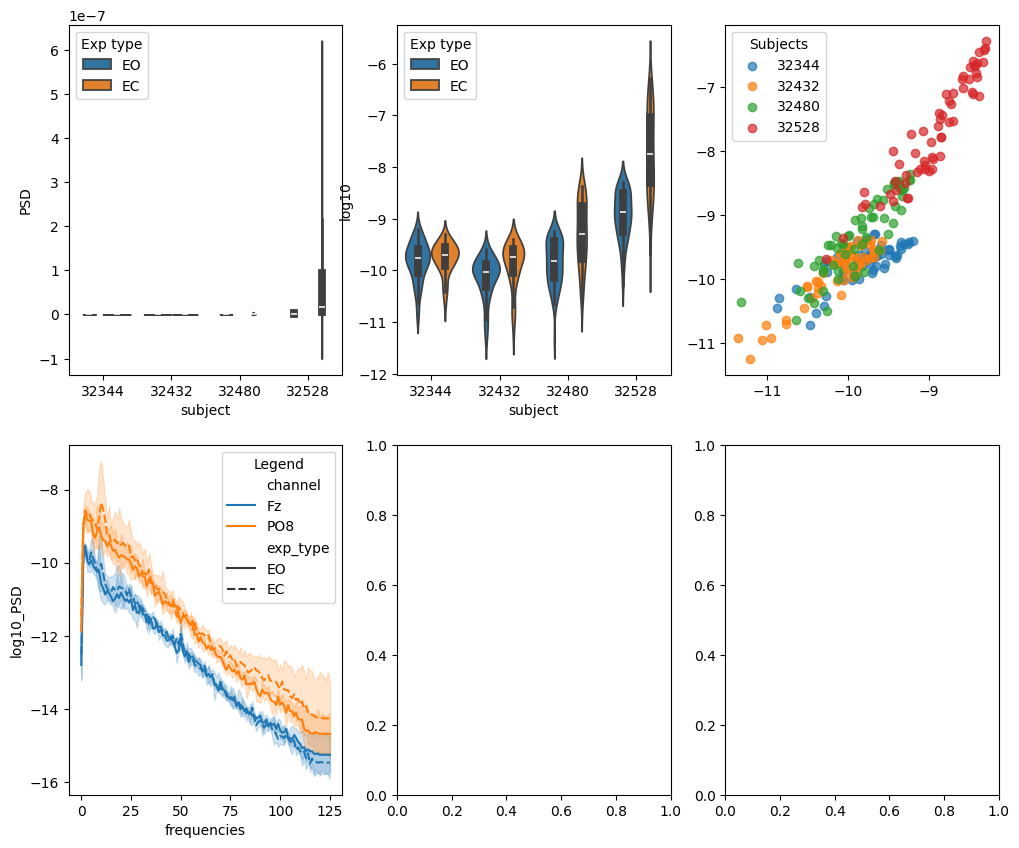

In [77]:
##### insert your code #####
psds_decimated = psds_df.loc[psds_df.index.unique()[::10]].reset_index()
values = ["Fz", "PO8"]

psds_long = psds_decimated.melt(
    id_vars=["frequencies", "subject", "exp_type"],
    value_vars=values,
    var_name="channel",
    value_name="PSD"
)

psds_long["log10_PSD"] = np.log10(psds_long["PSD"])

sns.lineplot(
    data=psds_long,
    x="frequencies",
    y="log10_PSD",
    hue="channel",
    style="exp_type",
    n_boot=100,
    ax=axes[1,0]
)

# Getting a duplication error in the legend
handles, labels = axes[1,0].get_legend_handles_labels()
unique = dict(zip(labels, handles))
limited_labels = list(unique.keys())[:6]
limited_handles = [unique[label] for label in limited_labels]

axes[1,0].legend(limited_handles, limited_labels, title="Legend", bbox_to_anchor=(1, 1))
fig
############################

Use Seaborn's `regplot` functions to plot the regression between `log10(PSD)` values for the `EO` condition (x) versus the `EC` (y) experimental conditions, for the channel `PO8`. Average across subjects before plotting these data, so that there is only one point per frequency, using the data frame with decimated frequencies. By default, `regplot` uses 'o' as markers, which draw large filled circles. Since there are a lot of points, all strongly correlated, these markers tend to hide the regression line. I recommended using `marker='.'` instead, which draws smaller points.

Note that in this case, these data are so tightly correlated that there is almost no uncertainty in the estimation of the regression line. In noisier cases, you would see not only the regression line but a lighter blue region showing the 95% confidence interval on the estimation of this regression line. Such regression plots can be very useful for quick exploration of your data, but more complex statistical analyses can benefit from a more sophisticated package like `statsmodels`.

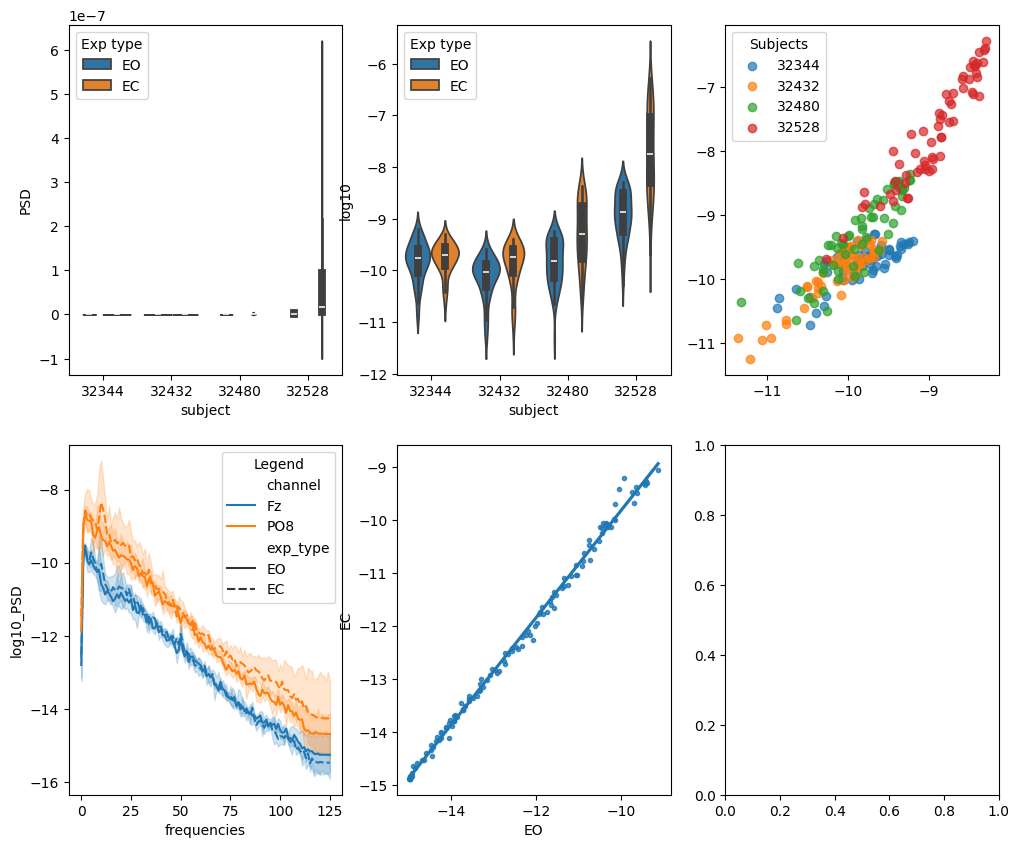

In [78]:
##### insert your code #####
long_pivot = psds_long.pivot_table(
    index="frequencies",
    columns="exp_type",
    values="log10_PSD",
    aggfunc="mean"
).reset_index()

sns.regplot(data=long_pivot, x="EO", y="EC", marker='.', ax=axes[1,1])
fig
############################

Write your name in the variable `name` to "sign" your figure.

In [79]:
##### insert your code #####
name = "Kevin Francis"
############################

axes[1, 2].imshow(qrcode.make(name))
axes[1, 2].get_xaxis().set_visible(False)
axes[1, 2].get_yaxis().set_visible(False)

Use the `tight_layout` method from Matplotlib's `Figure` class to ensure that all the elements (e.g., labels) are visible and do not overlap one another.

Also, do not forget to use titles (`Axes.set_title`) for your different panels and proper labels for your axes (`Axes.set_xlabel` and `Axes.set_ylabel`)! Note that Matplotlib will render properly latex mathematical notation put between $$ signs.

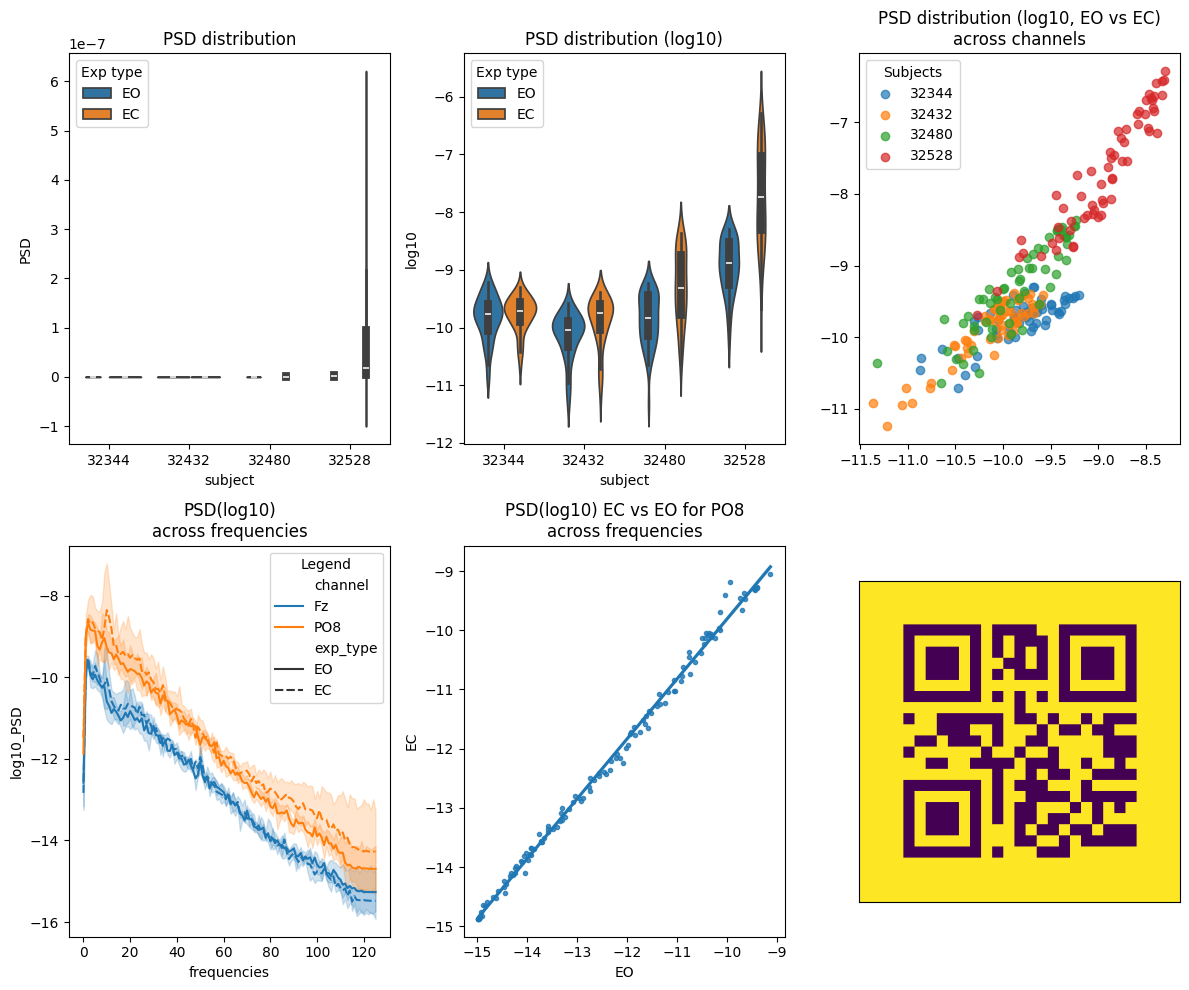

In [83]:
##### insert your code #####
axes[0,0].set_title("PSD distribution")
axes[0,1].set_title("PSD distribution (log10)")
axes[0,2].set_title("PSD distribution (log10, EO vs EC)\nacross channels")
axes[1,0].set_title("PSD(log10)\nacross frequencies")
axes[1,1].set_title("PSD(log10) EC vs EO for PO8\nacross frequencies")
fig.tight_layout() #Fixing overlap
fig
############################

Here is an example of what the final figure should look like:

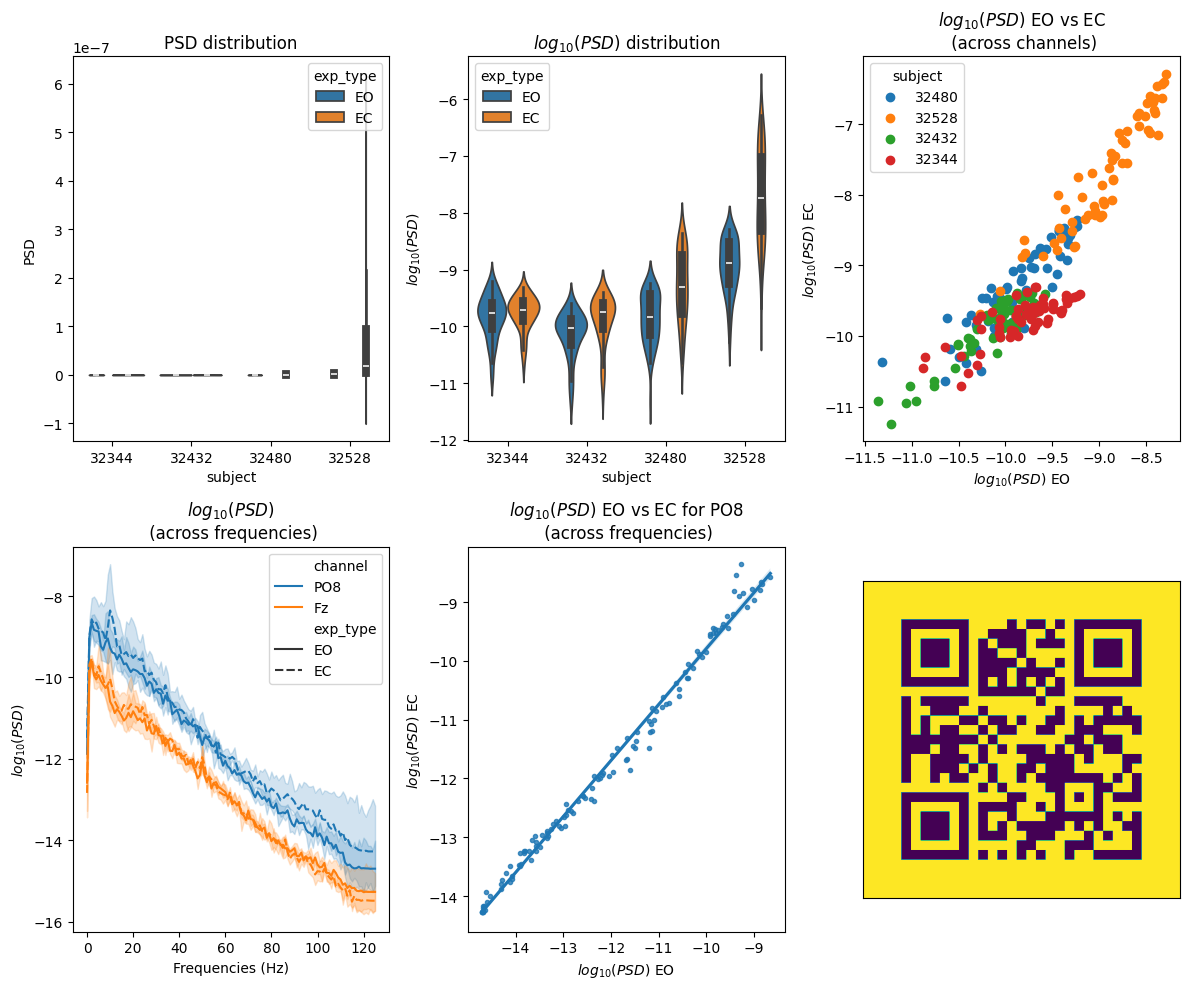

# Submission

Please submit a .ipynb file containing your answers in Blackboard. A simple way to generate such a .ipynb file from a Colab Notebook is to click File --> Download --> Download .ipynb. This .ipynb file will need to be added as an attachment to your submission. The deadline to submit your lab is specified on Blackboard. Late submissions are penalized 20% per day.